## **Function Transformer**

In [1]:
import pandas as pd 
import numpy as np 
import  matplotlib.pyplot as plt
import seaborn as sns 

import scipy.stats as stats

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('./dataset/train.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
df['Age'] = imputer.fit_transform(df[['Age']])

In [5]:
X = df.iloc[:, 1:3]
y = df.iloc[:, 0]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

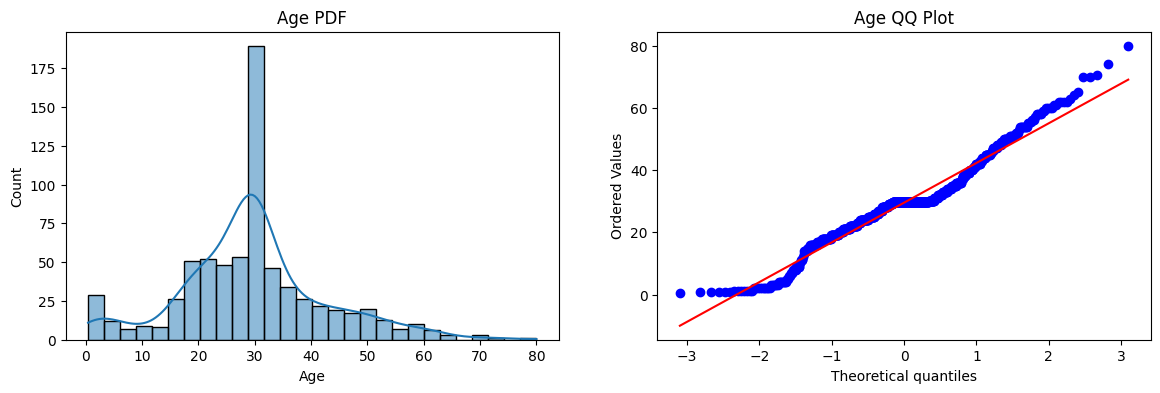

In [7]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(X_train['Age'], kde=True)
plt.title('Age PDF')

plt.subplot(1,2,2)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ Plot')

plt.show()

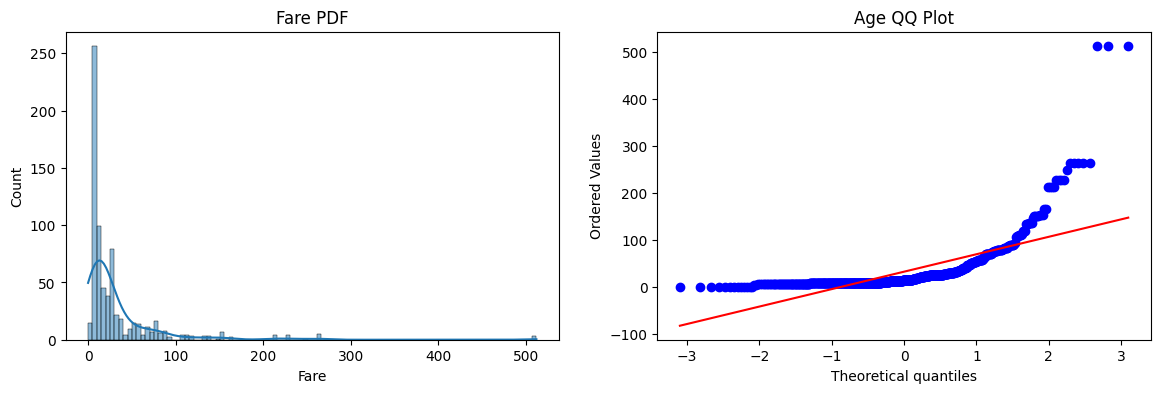

In [8]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Fare'], kde=True)
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Age QQ Plot')

plt.show()

In [9]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [11]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

print(f'Accuracy Score LR : {accuracy_score(y_test, y_pred)}')
print(f'Accuracy Score DT : {accuracy_score(y_test, y_pred2)}')

Accuracy Score LR : 0.6480446927374302
Accuracy Score DT : 0.6759776536312849


In [12]:
trf = FunctionTransformer(func= np.log1p)

In [13]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.fit_transform(X_test)

In [17]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_trf, y_train)
clf2.fit(X_train_trf, y_train)

y_pred = clf.predict(X_test_trf)
y_pred2 = clf2.predict(X_test_trf)

print(f'Accuracy LR TRf : {accuracy_score(y_test, y_pred)}')
print(f'Accuracy DT TRf : {accuracy_score(y_test, y_pred2)}')

Accuracy LR TRf : 0.6815642458100558
Accuracy DT TRf : 0.6759776536312849


In [18]:
X_trf = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print(f'LR: {np.mean(cross_val_score(clf, X_trf, y, scoring='accuracy', cv=10))}')
print(f'DT: {np.mean(cross_val_score(clf2, X_trf, y, scoring='accuracy', cv=10))}')

LR: 0.678027465667915
DT: 0.662222222222222


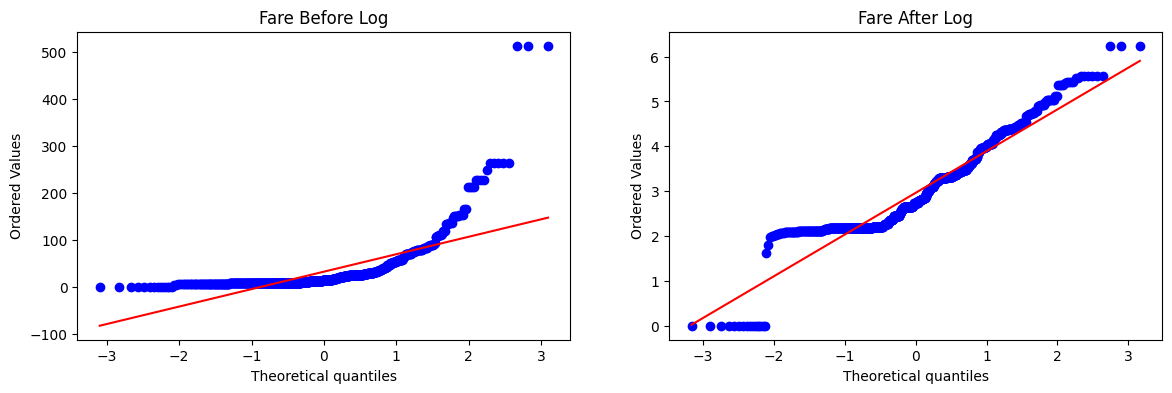

In [19]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_trf['Fare'], dist='norm', plot=plt)
plt.title('Fare After Log')
plt.show()

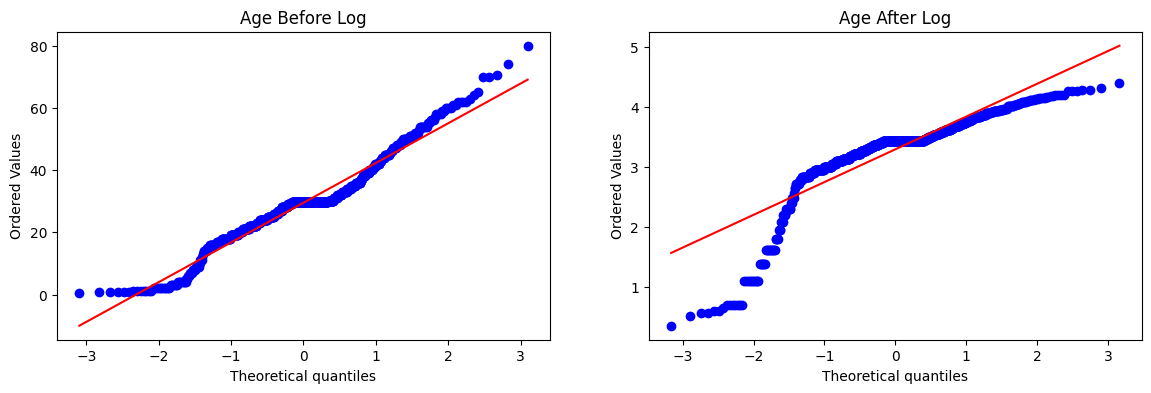

In [21]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_trf['Age'], dist='norm', plot=plt)
plt.title('Age After Log')
plt.show()

In [24]:
trf2 = ColumnTransformer([
    ('log', FunctionTransformer(np.log1p), ['Fare'])
], remainder='passthrough')
X_train_trf2 = trf2.fit_transform(X_train)
X_test_trf2 = trf2.fit_transform(X_test)

X_train_trf2

array([[ 3.38439026, 45.5       ],
       [ 2.63905733, 23.        ],
       [ 2.18885633, 32.        ],
       ...,
       [ 2.71524426, 41.        ],
       [ 4.79579055, 14.        ],
       [ 4.36038795, 21.        ]])

In [25]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_trf2, y_train)
clf2.fit(X_train_trf2, y_train)

y_pred = clf.predict(X_test_trf2)
y_pred2 = clf2.predict(X_test_trf2)

print(f'Accuracy LR : {accuracy_score(y_test, y_pred)}')
print(f'Accuracy DT : {accuracy_score(y_test, y_pred2)}')

Accuracy LR : 0.6703910614525139
Accuracy DT : 0.6815642458100558


In [27]:
X_trf2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_trf2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_trf2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6644319600499375


In [28]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6611485642946316


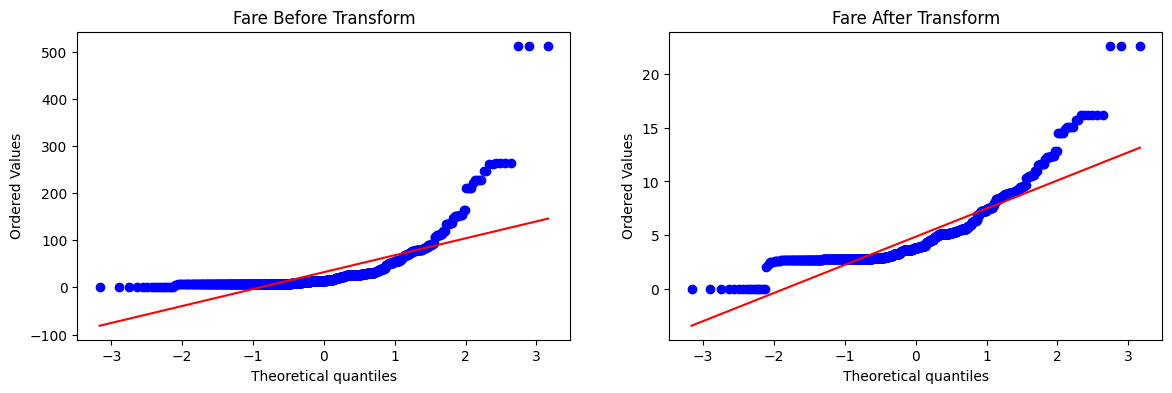

In [35]:
apply_transform(np.sqrt)